In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
data = pd.read_csv('dataset.csv')
sentences = data['text'].str.lower().tolist()
labels = data['label'].tolist()
stopword = [
    "yang", "dan", "di", "ke", "dari", "untuk", "dengan", "pada", "adalah",
    "ini", "itu", "saya", "kita", "anda", "akan", "telah", "sebagai", "atau",
    "jadi", "karena", "tidak", "dalam", "lebih", "lagi", "hanya", "sudah", "juga"
]



In [4]:
processed_sentences = []
for sentence in sentences:
    for word in stopword:
        sentence = sentence.replace(f" {word} ", " ")  # Remove stopwords
    processed_sentences.append(sentence.strip())

In [5]:
train_size = int(len(processed_sentences) * 0.8)

train_sentences = processed_sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences =processed_sentences[train_size:]
validation_labels = labels[train_size:]

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [7]:
training_label_seq = np.array(train_labels)
validation_label_seq = np.array(validation_labels)

In [8]:
model = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(tf.keras.layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
    ])

In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                            patience=2, 
                            verbose=1, 
                            restore_best_weights=True,
                            min_delta=0.01,
                            mode='max',  # 'max' will stop when accuracy reaches a maximum
                            baseline=0.94)

In [11]:
history = model.fit(train_padded, training_label_seq,
                    epochs=10,
                    validation_data=(validation_padded, validation_label_seq))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.1762 - loss: 1.9880 - val_accuracy: 0.5275 - val_loss: 1.2814
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.4883 - loss: 1.2807 - val_accuracy: 0.8238 - val_loss: 0.6751
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.8651 - loss: 0.4851 - val_accuracy: 0.7500 - val_loss: 0.6121
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8709 - loss: 0.3862 - val_accuracy: 0.9038 - val_loss: 0.3540
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.9380 - loss: 0.2264 - val_accuracy: 0.9225 - val_loss: 0.3159
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.9588 - loss: 0.1733 - val_accuracy: 0.9125 - val_loss: 0.3061
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.9738 - loss: 0.1083 - val_accuracy: 0.8650 - val_loss: 0.4992
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9170 - loss: 0

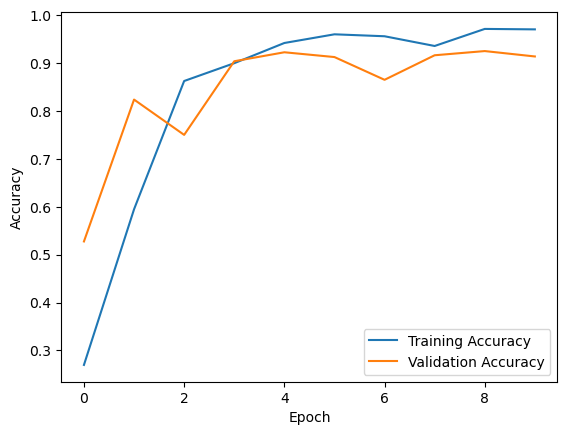

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Bagian untuk mengetes input manual
while True:
    user_input = input("input ").lower()
    if user_input == "exit":
        print("Program selesai.")
        break

    # Hilangkan stopword pada input
    for word in stopword:
        user_input = user_input.replace(f" {word} ", " ")
    
    # Preprocessing input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, padding=padding_type, maxlen=max_length)

    # Prediksi emosi menggunakan model
    prediction = model.predict(user_input_padded)
    predicted_label = np.argmax(prediction)

    print(f"Prediksi emosi: {predicted_label} (Confidence: {np.max(prediction) * 100:.2f}%)")


input  aku suka dia


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediksi emosi: 5 (Confidence: 95.62%)


input  aku yakin bisa bersama dia hingga akhir hayat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediksi emosi: 7 (Confidence: 99.87%)


input  aku bisa bersama dia hingga akhir hayat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediksi emosi: 7 (Confidence: 84.92%)


input  aku tetap setia dengan dia sampai akhir hayat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediksi emosi: 5 (Confidence: 85.77%)
